In [1]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, Model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Conv2DTranspose
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from tensorflow.keras.losses import binary_crossentropy
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import zipfile
import os
import time
import cv2
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import cv2
import os

In [7]:
base_dir = '/content/drive/MyDrive/Data/FaceExpressions/dataset'
data_path = '/content/drive/MyDrive/Data/FaceExpressions/data.csv'
data = pd.read_csv(data_path)
print(data.head())

   Unnamed: 0                                               path     label
0           0  Surprise/1bd930d6a1c717c11be33db74823f661cb53f...  Surprise
1           1       Surprise/cropped_emotions.100096~12fffff.png  Surprise
2           2  Surprise/0df0e470e33093f5b72a8197fa209d684032c...  Surprise
3           3       Surprise/cropped_emotions.260779~12fffff.png  Surprise
4           4       Surprise/cropped_emotions.263616~12fffff.png  Surprise


In [8]:
for root, dirs, files in os.walk(base_dir):
    print(root, dirs, len(files))

/content/drive/MyDrive/Data/FaceExpressions/dataset ['Ahegao', 'Angry', 'Sad', 'Surprise', 'Neutral', 'Happy'] 0
/content/drive/MyDrive/Data/FaceExpressions/dataset/Ahegao [] 1205
/content/drive/MyDrive/Data/FaceExpressions/dataset/Angry [] 1313
/content/drive/MyDrive/Data/FaceExpressions/dataset/Sad [] 3934
/content/drive/MyDrive/Data/FaceExpressions/dataset/Surprise [] 1234
/content/drive/MyDrive/Data/FaceExpressions/dataset/Neutral [] 4027
/content/drive/MyDrive/Data/FaceExpressions/dataset/Happy [] 3750


Index(['Unnamed: 0', 'path', 'label'], dtype='object')
   Unnamed: 0                                               path     label
0           0  Surprise/1bd930d6a1c717c11be33db74823f661cb53f...  Surprise
1           1       Surprise/cropped_emotions.100096~12fffff.png  Surprise
2           2  Surprise/0df0e470e33093f5b72a8197fa209d684032c...  Surprise
3           3       Surprise/cropped_emotions.260779~12fffff.png  Surprise
4           4       Surprise/cropped_emotions.263616~12fffff.png  Surprise


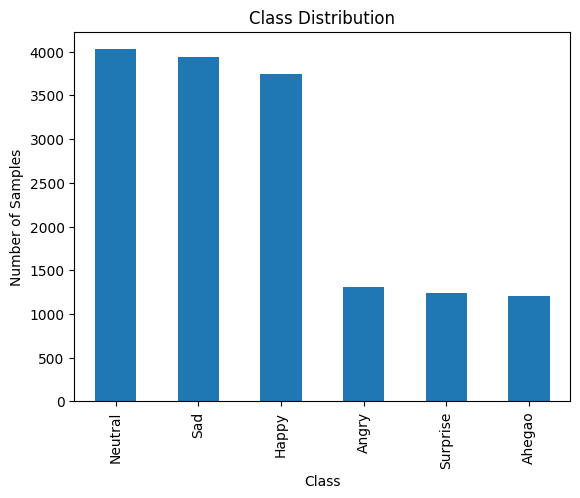

In [9]:
print(data.columns)
print(data.head())

# Plot class distribution
if 'label' in data.columns:
    data['label'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()
else:
    print("The 'label' column is not present in the DataFrame.")

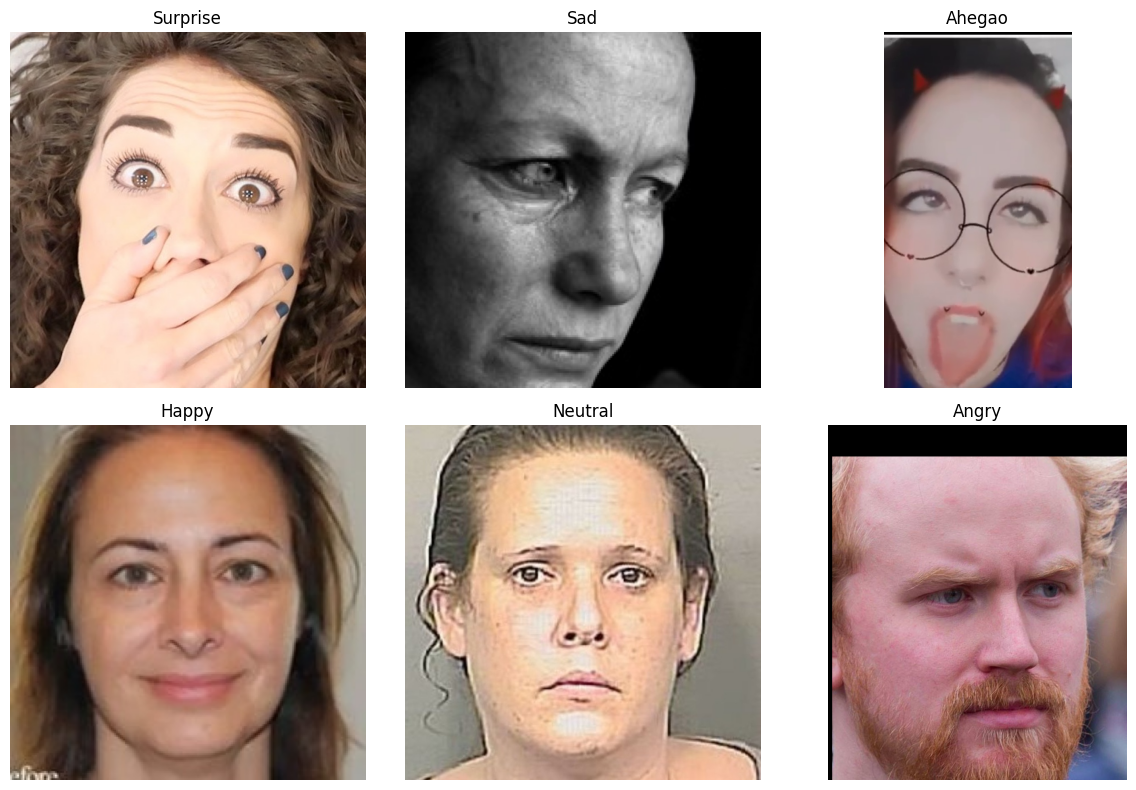

In [10]:
if 'label' in data.columns and 'path' in data.columns:
    plt.figure(figsize=(12, 8))

    expressions_unique = data['label'].unique()

    for i, expression in enumerate(expressions_unique):
        image_path_sample = data[data['label'] == expression]['path'].values[0]
        image_path_full = os.path.join(base_dir, image_path_sample)

        if os.path.exists(image_path_full):
            image = cv2.imread(image_path_full)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.subplot(2, 3, i + 1)
            plt.imshow(image)
            plt.title(expression)
            plt.axis('off')
        else:
            print(f"Image path {image_path_full} does not exist.")

    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame does not have the required 'label' and 'path' columns.")

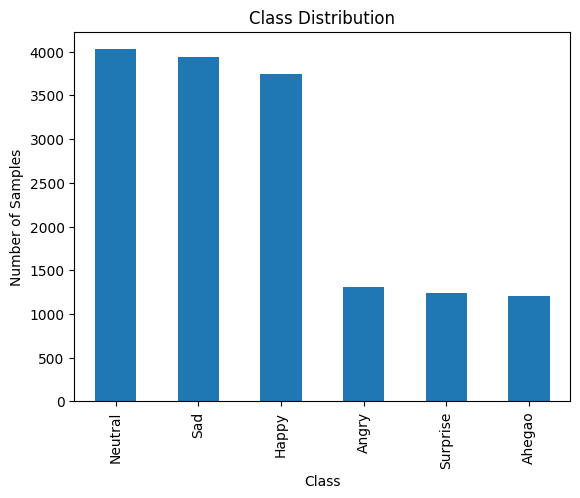

In [6]:
# Plot class distribution
data['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [13]:
# Clean paths if needed
data['path'] = data['path'].apply(lambda x: x.strip())  # Remove any extra spaces

# Verify paths
def verify_paths(dataframe, base_dir):
    invalid_paths = []
    for path in dataframe['path']:
        full_path = os.path.join(base_dir, path)
        if not os.path.exists(full_path):
            invalid_paths.append(full_path)
    return invalid_paths

# Check if some image files exist
invalid_paths = verify_paths(data, base_dir)

if invalid_paths:
    print(f"Found {len(invalid_paths)} invalid image filenames:")
    for path in invalid_paths:
        print(path)
else:
    print("All image filenames are valid.")

    # Create ImageDataGenerator
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Create the generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory=base_dir,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    print("ImageDataGenerator created successfully.")

Streaming output truncated to the last 5000 lines.
path_to_images_directory/Neutral/1ae907fc29b2dc0bdda12201385eaddf0b075412d01e2b29887616e6f.jpg
path_to_images_directory/Neutral/cropped_emotions.452754f.png
path_to_images_directory/Neutral/0e6c453fb773a2ec9f3f5f1fa679d3757d253dc3616c1419368a24dcf.jpg
path_to_images_directory/Neutral/1ae819a7552fdcf4df231f1f5e5c4135cd01de7956029f8826c527f9f.jpg
path_to_images_directory/Neutral/cropped_emotions.278055f.png
path_to_images_directory/Neutral/0bb30eed9504e8b9cbd99907da24f86f5f9ded18483650e5b58bac39f.jpg
path_to_images_directory/Neutral/0eabeac43f89515b356cc35bebe240a49b8ef5ac67ce03bc1831ee2cf.jpg
path_to_images_directory/Neutral/0bb42688c8a1a5178ddea4ed3a825a3acd9930838df0ba08239ae780f.jpg
path_to_images_directory/Neutral/1b4c73776f71aa751bef7eb22a46277851ff4cf26bd1fc609ac0c4d7f.jpg
path_to_images_directory/Neutral/0aa5b8a4606820be57a38afbc5613d90e01d9e04d81aba8c59a7e8eef.jpg
path_to_images_directory/Neutral/0fcbd20170aaa8f4244cb8f921541947

In [17]:
# Clean paths if needed
data['path'] = data['path'].apply(lambda x: x.strip())  # Remove any extra spaces

# Verify paths
def verify_paths(dataframe, base_dir):
    invalid_paths = []
    for path in dataframe['path']:
        full_path = os.path.join(base_dir, path)
        if not os.path.exists(full_path):
            invalid_paths.append(full_path)
    return invalid_paths

# Check if some image files exist
invalid_paths = verify_paths(data, base_dir)

if invalid_paths:
    print(f"Found {len(invalid_paths)} invalid image filenames:")
    for path in invalid_paths:
        print(path)
else:
    print("All image filenames are valid.")

    # Create ImageDataGenerator
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory=base_dir,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Check if generator is not empty
    if train_generator.samples == 0:
        print("No images found. Please check your paths and dataset.")
    else:
        print("ImageDataGenerator created successfully.")

        # Define a simple model (update according to your needs)
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(train_generator.num_classes, activation='softmax')
        ])

        # Compile the model with updated optimizer
        model.compile(optimizer=Adam(learning_rate=0.001),  # Updated parameter
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(
            train_generator,
            epochs=10,
            steps_per_epoch=train_generator.samples // train_generator.batch_size
        )

Streaming output truncated to the last 5000 lines.
path_to_images_directory/Neutral/1ae907fc29b2dc0bdda12201385eaddf0b075412d01e2b29887616e6f.jpg
path_to_images_directory/Neutral/cropped_emotions.452754f.png
path_to_images_directory/Neutral/0e6c453fb773a2ec9f3f5f1fa679d3757d253dc3616c1419368a24dcf.jpg
path_to_images_directory/Neutral/1ae819a7552fdcf4df231f1f5e5c4135cd01de7956029f8826c527f9f.jpg
path_to_images_directory/Neutral/cropped_emotions.278055f.png
path_to_images_directory/Neutral/0bb30eed9504e8b9cbd99907da24f86f5f9ded18483650e5b58bac39f.jpg
path_to_images_directory/Neutral/0eabeac43f89515b356cc35bebe240a49b8ef5ac67ce03bc1831ee2cf.jpg
path_to_images_directory/Neutral/0bb42688c8a1a5178ddea4ed3a825a3acd9930838df0ba08239ae780f.jpg
path_to_images_directory/Neutral/1b4c73776f71aa751bef7eb22a46277851ff4cf26bd1fc609ac0c4d7f.jpg
path_to_images_directory/Neutral/0aa5b8a4606820be57a38afbc5613d90e01d9e04d81aba8c59a7e8eef.jpg
path_to_images_directory/Neutral/0fcbd20170aaa8f4244cb8f921541947

In [19]:
# Clean paths
data['path'] = data['path'].apply(lambda x: x.strip())  # Remove any extra spaces

# Verify paths
def verify_paths(dataframe, base_dir):
    invalid_paths = []
    for path in dataframe['path']:
        full_path = os.path.join(base_dir, path)
        if not os.path.exists(full_path):
            invalid_paths.append(full_path)
    return invalid_paths

# Check image files
invalid_paths = verify_paths(data, base_dir)
if invalid_paths:
    print(f"Found {len(invalid_paths)} invalid image filenames:")
    for path in invalid_paths:
        print(path)
else:
    print("All image filenames are valid.")

    # Split data into training and validation
    from sklearn.model_selection import train_test_split
    train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)

    # Create ImageDataGenerators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory=base_dir,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory=base_dir,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Check if generators have samples
    if train_generator.samples == 0 or val_generator.samples == 0:
        print("Generators have no samples. Please check your paths and dataset.")
    else:
        print("Generators created successfully.")

        # Define a simple CNN model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(train_generator.num_classes, activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(
            train_generator,
            epochs=10,
            validation_data=val_generator,
            steps_per_epoch=train_generator.samples // train_generator.batch_size,
            validation_steps=val_generator.samples // val_generator.batch_size
        )

        # Plot training & validation accuracy
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'])
        plt.show()

        # Plot training & validation loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'])
        plt.show()

        # Save the model
        model.save('face_expression_model.h5')
        print("Model saved to 'face_expression_model.h5'.")

Streaming output truncated to the last 5000 lines.
path_to_images_directory/Neutral/1ae907fc29b2dc0bdda12201385eaddf0b075412d01e2b29887616e6f.jpg
path_to_images_directory/Neutral/cropped_emotions.452754f.png
path_to_images_directory/Neutral/0e6c453fb773a2ec9f3f5f1fa679d3757d253dc3616c1419368a24dcf.jpg
path_to_images_directory/Neutral/1ae819a7552fdcf4df231f1f5e5c4135cd01de7956029f8826c527f9f.jpg
path_to_images_directory/Neutral/cropped_emotions.278055f.png
path_to_images_directory/Neutral/0bb30eed9504e8b9cbd99907da24f86f5f9ded18483650e5b58bac39f.jpg
path_to_images_directory/Neutral/0eabeac43f89515b356cc35bebe240a49b8ef5ac67ce03bc1831ee2cf.jpg
path_to_images_directory/Neutral/0bb42688c8a1a5178ddea4ed3a825a3acd9930838df0ba08239ae780f.jpg
path_to_images_directory/Neutral/1b4c73776f71aa751bef7eb22a46277851ff4cf26bd1fc609ac0c4d7f.jpg
path_to_images_directory/Neutral/0aa5b8a4606820be57a38afbc5613d90e01d9e04d81aba8c59a7e8eef.jpg
path_to_images_directory/Neutral/0fcbd20170aaa8f4244cb8f921541947

All image filenames are valid.
Found 12362 validated image filenames belonging to 6 classes.
Found 3091 validated image filenames belonging to 6 classes.
Generators created successfully.
Epoch 1/10
386/386 [==============================] - 1865s 5s/step - loss: 2.5395 - accuracy: 0.2929 - val_loss: 1.4901 - val_accuracy: 0.3750
Epoch 2/10
386/386 [==============================] - 992s 3s/step - loss: 1.5441 - accuracy: 0.3406 - val_loss: 1.5159 - val_accuracy: 0.3477
Epoch 3/10
386/386 [==============================] - 976s 3s/step - loss: 1.5238 - accuracy: 0.3455 - val_loss: 1.4585 - val_accuracy: 0.3887
Epoch 4/10
386/386 [==============================] - 1020s 3s/step - loss: 1.4948 - accuracy: 0.3620 - val_loss: 1.4479 - val_accuracy: 0.3955
Epoch 5/10
386/386 [==============================] - 1014s 3s/step - loss: 1.4881 - accuracy: 0.3695 - val_loss: 1.4271 - val_accuracy: 0.4215
Epoch 6/10
386/386 [==============================] - 1014s 3s/step - loss: 1.4766 - accuracy: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to '/content/drive/MyDrive/Data/FaceExpressions/face_expression_model.h5'.


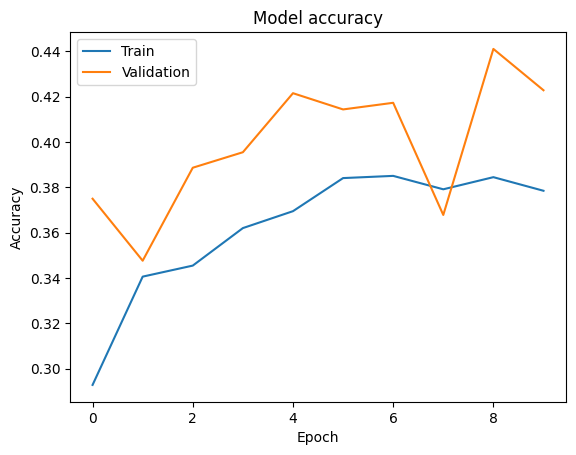

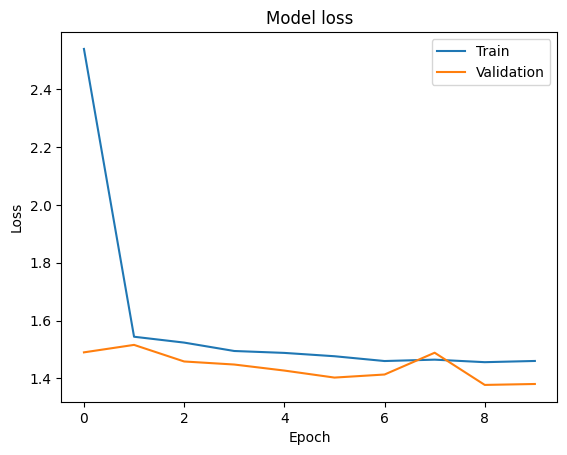

Model file found: /content/drive/MyDrive/Data/FaceExpressions/face_expression_model.h5


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/new/image.jpg'

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths
base_dir = '/content/drive/MyDrive/Data/FaceExpressions/dataset'
data_path = '/content/drive/MyDrive/Data/FaceExpressions/data.csv'
model_file_path = '/content/drive/MyDrive/Data/FaceExpressions/face_expression_model.h5'

# Load data
data = pd.read_csv(data_path)

# Clean paths
data['path'] = data['path'].apply(lambda x: x.strip())  # Remove any extra spaces

# Verify paths
def verify_paths(dataframe, base_dir):
    invalid_paths = []
    for path in dataframe['path']:
        full_path = os.path.join(base_dir, path)
        if not os.path.exists(full_path):
            invalid_paths.append(full_path)
    return invalid_paths

# Check image files
invalid_paths = verify_paths(data, base_dir)
if invalid_paths:
    print(f"Found {len(invalid_paths)} invalid image filenames:")
    for path in invalid_paths:
        print(path)
else:
    print("All image filenames are valid.")

    # Split data into training and validation
    train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)

    # Create ImageDataGenerators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory=base_dir,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory=base_dir,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Check if generators have samples
    if train_generator.samples == 0 or val_generator.samples == 0:
        print("Generators have no samples. Please check your paths and dataset.")
    else:
        print("Generators created successfully.")

        # Get the number of classes
        num_classes = len(train_generator.class_indices)

        # Define a simple CNN model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(num_classes, activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(
            train_generator,
            epochs=10,
            validation_data=val_generator,
            steps_per_epoch=train_generator.samples // train_generator.batch_size,
            validation_steps=val_generator.samples // val_generator.batch_size
        )

        # Save the model
        model.save(model_file_path)
        print(f"Model saved to '{model_file_path}'.")

        # Plot training & validation accuracy
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'])
        plt.show()

        # Plot training & validation loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'])
        plt.show()

# Check if model file exists
if os.path.exists(model_file_path):
    print(f"Model file found: {model_file_path}")

    # Load the saved model
    model = load_model(model_file_path)

    # Function to predict on a new image
    def predict_image(image_path):
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        return predictions

    # Test with a new image
    test_image_path = '/path/to/new/image.jpg'
    predictions = predict_image(test_image_path)
    print(predictions)

    # Confusion Matrix
    val_generator.reset()
    predictions = model.predict(val_generator)
    predicted_classes = np.argmax(predictions, axis=1)

    # Get true labels
    true_classes = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    # Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
else:
    print(f"Model file not found: {model_file_path}")
